   Size  Location  Number of Rooms   Price
0  3219     rural                4  364193
1  1056     urban                2  112910
2   702  suburban                3   99434
3  1726     urban                2  201092
4  1603     rural                4  190665
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


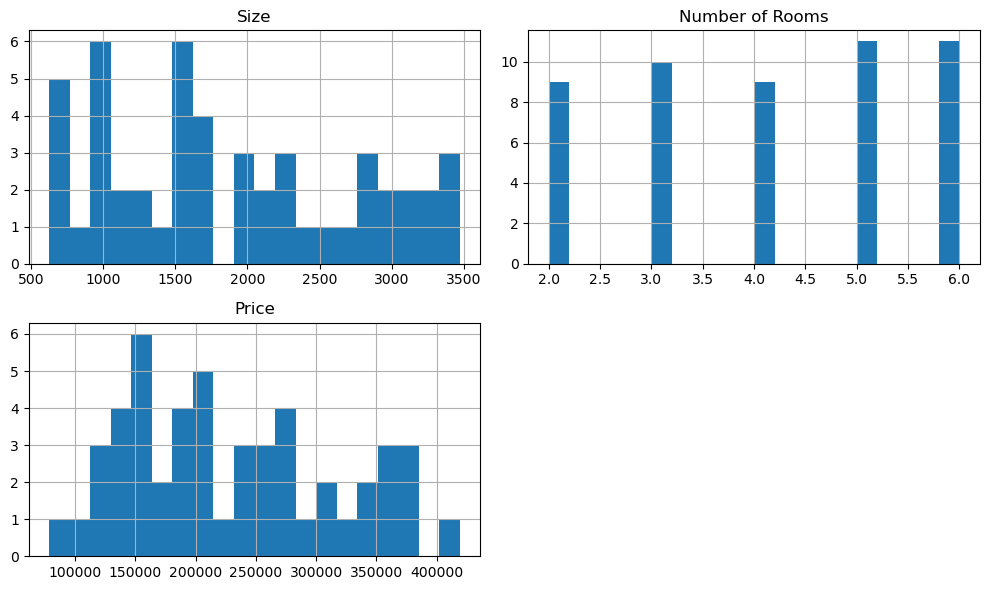

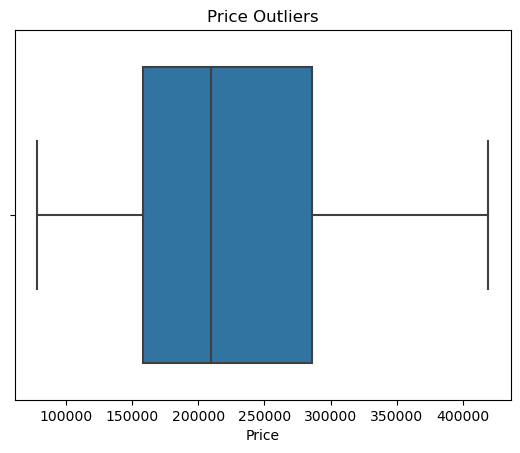

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("house_prices.csv")

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Distribution of numerical features
df[['Size', 'Number of Rooms', 'Price']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Boxplot to detect outliers
sns.boxplot(x=df['Price'])
plt.title('Price Outliers')
plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handling missing values (basic fill strategy as example)
df = df.dropna()  # or use df.fillna(method='ffill') if appropriate

# Separating features and target
X = df[['Size', 'Number of Rooms', 'Location']]
y = df['Price']

# One-hot encode 'Location', scale numeric features
preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), ['Size', 'Number of Rooms']),
    ("cat", OneHotEncoder(), ['Location'])
])


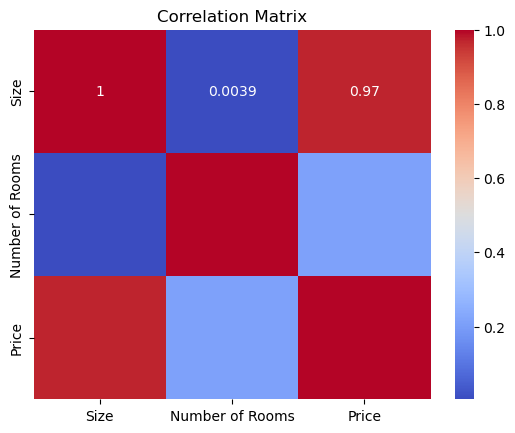

In [10]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the dataset
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

RMSE: 15275.87
R² Score: 0.96


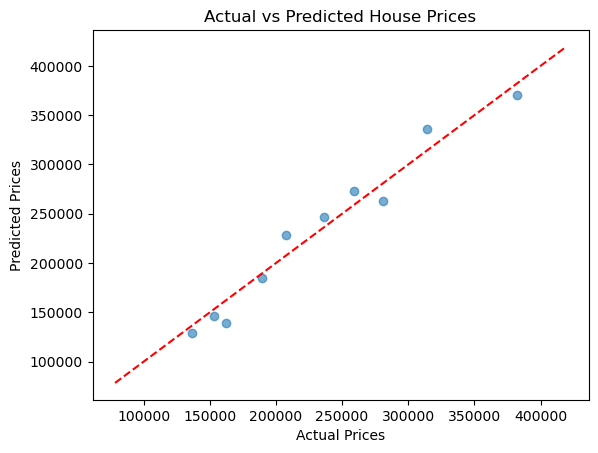

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict
y_pred = model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Predicted vs Actual Plot
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


In [19]:
feature_names = preprocessor.get_feature_names_out()
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
print(coef_df.sort_values(by="Coefficient", ascending=False))


                  Feature    Coefficient
0               num__Size  279305.367778
1    num__Number of Rooms   49683.868053
3  cat__Location_suburban    1866.473416
4     cat__Location_urban    1385.647784
2     cat__Location_rural   -3252.121199
